# Task 3

This notebook is part of Milestone 3, Question 3. You can work on this notebook on your laptop to develop your machine learning model using all the learnings from the previous courses. At the end of this notebook, when you are ready to train the model, you will need to obtain the hyperparameters from the hyperparameter tuning job that you will run in Milestone 3 Question 4 (i.e., the notebook named `Milestone3-Task4.ipynb`).

PS: To speed up the process, you can test the model without the hyperparameters first. Once other team members obtain the hyperparameters, you can retrain the model using those hyperparameters and test it again.

In [3]:
# I asked them to use their laptop so they already got all these packages from previous courses.
# %pip install joblib scikit-learn matplotlib s3fs

# Imports

In [1]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [2]:
## Remember by default it looks for credentials in home directory. 
## Make sure your updated credentials are in home directory
## or pass credentials explicitly and pass as storage_options=aws_credentials (not a good idea)
# aws_credentials = {"key": "","secret": "","token":""}
# replace with s3 path to your data
df = pd.read_csv("s3://mds-s3-12-cevj/output/ml_data_SYD.csv", index_col=0, parse_dates=True)
#df = pd.read_csv("data/ml_data_SYD.csv", index_col=0, parse_dates=True)
df

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,3.557934e+01,4.268112e+00,1.107466e-03,1.141054e+01,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520e+00,1.190141e+00,1.015323e-04,4.014984e+00,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467e+00,1.003845e-09,1.760345e-05,9.660565e+00,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624e+00,8.225225e-02,1.808932e-01,3.951528e+00,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686e+00,2.496841e+00,4.708019e-09,2.766362e+00,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,0.033748,0.123476,1.451179e+00,3.852845e+01,2.061717e-03,8.179260e-09,1.171263e-02,0.090786,59.895053,5.071783,...,4.726998e-13,1.326889e-01,1.827857e+00,6.912632e-03,2.171327e-03,1.620489e+00,2.084252,0.868046,17.444923,0.037472
2014-12-28,0.094198,2.645496,4.249335e+01,5.833801e-01,5.939502e-09,8.146937e-01,4.938899e-01,0.000000,0.512632,1.578188,...,4.609420e-13,1.644482e+00,7.242920e-01,2.836752e-03,1.344768e+01,2.391159e+00,1.644527,0.782258,1.569647,0.158061
2014-12-29,0.005964,3.041667,2.898325e+00,9.359547e-02,2.000051e-08,2.532205e-01,1.306046e+00,0.000002,37.169669,1.565885,...,2.016156e+01,1.506439e+00,1.049481e-01,8.137182e+00,2.547820e+01,1.987695e-12,0.205036,2.140723,1.444630,0.025719


In [3]:
df = df.dropna()
df

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,3.557934e+01,4.268112e+00,1.107466e-03,1.141054e+01,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520e+00,1.190141e+00,1.015323e-04,4.014984e+00,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467e+00,1.003845e-09,1.760345e-05,9.660565e+00,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624e+00,8.225225e-02,1.808932e-01,3.951528e+00,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686e+00,2.496841e+00,4.708019e-09,2.766362e+00,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,0.033748,0.123476,1.451179e+00,3.852845e+01,2.061717e-03,8.179260e-09,1.171263e-02,0.090786,59.895053,5.071783,...,4.726998e-13,1.326889e-01,1.827857e+00,6.912632e-03,2.171327e-03,1.620489e+00,2.084252,0.868046,17.444923,0.037472
2014-12-28,0.094198,2.645496,4.249335e+01,5.833801e-01,5.939502e-09,8.146937e-01,4.938899e-01,0.000000,0.512632,1.578188,...,4.609420e-13,1.644482e+00,7.242920e-01,2.836752e-03,1.344768e+01,2.391159e+00,1.644527,0.782258,1.569647,0.158061
2014-12-29,0.005964,3.041667,2.898325e+00,9.359547e-02,2.000051e-08,2.532205e-01,1.306046e+00,0.000002,37.169669,1.565885,...,2.016156e+01,1.506439e+00,1.049481e-01,8.137182e+00,2.547820e+01,1.987695e-12,0.205036,2.140723,1.444630,0.025719


In [4]:
train, validation = train_test_split(df, test_size=0.2, random_state=123, shuffle=False)

In [5]:
train

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,3.557934e+01,4.268112e+00,1.107466e-03,11.410537,3.322009e-08,2.668800e+00,1.321215,1.515293e+00,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520e+00,1.190141e+00,1.015323e-04,4.014984,1.312700e+00,9.462112e-01,2.788724,4.771375e+00,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467e+00,1.003845e-09,1.760345e-05,9.660565,9.103720e+00,4.319986e-01,0.003672,4.233980e+00,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624e+00,8.225225e-02,1.808932e-01,3.951528,1.317160e+01,3.686932e-01,0.013578,1.525249e+01,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686e+00,2.496841e+00,4.708019e-09,2.766362,1.822940e+01,3.392669e-01,0.002468,1.192036e+01,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989-10-15,0.191974,9.888887,1.144984e-13,5.301158e-09,8.230266e-02,1.204941,3.242353e+00,2.587784e+00,1.958446,3.132820e-01,...,5.771116e-01,7.392839e-04,1.199184e-13,4.263576e-01,1.571753e-13,3.625428e+01,0.005356,0.694962,0.137716,0.000000
1989-10-16,2.749677,15.723924,1.131656e-13,1.283378e-08,3.446456e-03,0.204099,2.565220e-01,1.611558e-01,0.218410,4.863739e-02,...,5.355030e-02,1.624413e-03,9.785748e-14,3.543803e+00,1.439218e-01,3.800867e+01,1.779670,0.112999,0.006744,0.000000
1989-10-17,2.664550,4.509132,6.436145e+00,3.313698e-06,8.259406e-01,0.037920,3.146124e+00,1.160612e-11,0.019162,9.307861e-02,...,3.800063e-13,1.306481e-13,9.816469e-14,1.187569e-01,4.781165e-02,7.985853e-02,17.308330,0.302534,0.046808,0.026464


In [6]:
validation

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed
time,,,,,,,,,,,,,,,,,,,,,
1989-10-20,0.219339,0.001521,1.117539e-13,4.180110e-01,4.989895e+00,1.161463e+00,0.135131,2.092660e+00,0.181639,-4.895401e-20,...,3.164336e+00,1.247387e-13,3.552636e+00,4.248013e-18,3.485942e-02,6.894595e-02,0.125749,0.033357,1.895946,0.700673
1989-10-21,0.055218,1.819894,1.566437e+00,1.269076e-08,9.158790e-01,6.769912e-01,0.008308,9.136886e-01,0.956078,-7.228011e-20,...,2.011657e-05,1.292251e-13,2.833620e-01,4.177801e-01,1.130954e-07,9.603990e-02,0.078274,1.824664,0.973379,0.341154
1989-10-22,0.013428,0.588268,1.072806e-13,2.165644e-02,7.124331e+00,2.456995e+00,3.445798,7.479689e-01,0.009526,1.115799e-02,...,8.008385e+00,2.089910e-01,1.022562e-13,2.155149e+00,1.850952e-08,8.172772e+00,0.030886,2.806819,0.000277,0.009556
1989-10-23,1.452529,0.561795,5.502284e-01,5.186514e+01,3.420923e+00,4.374916e+00,21.353840,1.860805e-13,0.081571,6.265640e-02,...,6.268322e-02,3.488716e-02,1.122544e-13,3.248625e+00,1.601959e-13,1.218779e+00,1.615460,0.107130,0.035640,0.597030
1989-10-24,0.148280,0.491199,3.590355e-01,2.572335e+00,5.143028e+00,7.720900e+00,4.057471,3.618783e-02,0.003499,2.167654e+00,...,7.796307e+00,1.223828e-13,1.107384e-13,4.513370e+00,2.978377e-02,1.944571e+00,1.315995,0.504264,0.836204,2.249953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,0.033748,0.123476,1.451179e+00,3.852845e+01,2.061717e-03,8.179260e-09,0.011713,9.078588e-02,59.895053,5.071783e+00,...,4.726998e-13,1.326889e-01,1.827857e+00,6.912632e-03,2.171327e-03,1.620489e+00,2.084252,0.868046,17.444923,0.037472
2014-12-28,0.094198,2.645496,4.249335e+01,5.833801e-01,5.939502e-09,8.146937e-01,0.493890,0.000000e+00,0.512632,1.578188e+00,...,4.609420e-13,1.644482e+00,7.242920e-01,2.836752e-03,1.344768e+01,2.391159e+00,1.644527,0.782258,1.569647,0.158061
2014-12-29,0.005964,3.041667,2.898325e+00,9.359547e-02,2.000051e-08,2.532205e-01,1.306046,2.154672e-06,37.169669,1.565885e+00,...,2.016156e+01,1.506439e+00,1.049481e-01,8.137182e+00,2.547820e+01,1.987695e-12,0.205036,2.140723,1.444630,0.025719


In [7]:
train.describe()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed
count,36791.000000,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,...,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,3.679100e+04,3.679100e+04,36791.000000
mean,2.418944,2.896285,3.664706e+00,2.211732e+00,2.767789e+00,3.101337,3.595210e+00,3.498250e+00,2.966061,2.597035e+00,...,3.212287e+00,1.322584e+00,2.079747e+00,1.491225e+00,1.722461e+00,2.445703,2.838375,3.319782e+00,3.441402e+00,2.777732
std,6.781286,6.879413,7.214366e+00,6.544580e+00,6.010654e+00,6.500920,7.387164e+00,7.078336e+00,7.024007,5.798388e+00,...,6.922027e+00,4.920043e+00,5.407070e+00,4.838441e+00,4.845465e+00,5.808536,6.980070,7.882558e+00,7.571911e+00,8.284286
min,0.000000,0.000000,9.161142e-14,4.370610e-24,1.107181e-24,0.000000,-4.503054e-17,-3.186177e-19,0.000000,-9.934637e-19,...,3.315622e-13,1.088608e-13,9.204019e-14,9.479186e-33,1.429162e-13,0.000000,0.000000,-3.604673e-17,-2.148475e-14,0.000000
25%,0.054225,0.021811,2.585608e-02,4.033173e-04,2.657978e-03,0.138223,8.795451e-02,9.175020e-02,0.023616,1.287460e-02,...,1.408160e-04,1.271249e-13,1.357380e-13,5.740648e-05,1.852582e-13,0.005352,0.009713,3.741288e-02,4.905343e-02,0.008818
50%,0.190864,0.491260,5.759248e-01,9.092876e-02,3.053905e-01,0.633034,8.247926e-01,8.422411e-01,0.368521,4.410744e-01,...,2.130571e-01,1.659617e-03,1.172821e-01,3.069196e-02,5.106960e-02,0.168483,0.248595,6.406431e-01,6.675421e-01,0.182341
75%,1.418816,2.388891,3.547054e+00,1.332665e+00,2.526573e+00,3.185832,3.742353e+00,3.615350e+00,2.682899,2.351880e+00,...,2.703393e+00,3.560368e-01,1.218444e+00,6.646839e-01,7.905046e-01,1.822219,2.428031,3.206986e+00,3.211678e+00,1.648488
max,149.967634,157.605713,8.946575e+01,1.344652e+02,8.713472e+01,109.098855,1.401478e+02,1.375916e+02,135.569753,1.342262e+02,...,9.306766e+01,1.038506e+02,8.005998e+01,1.051568e+02,8.045783e+01,114.898109,163.164524,1.549718e+02,1.166465e+02,256.455080


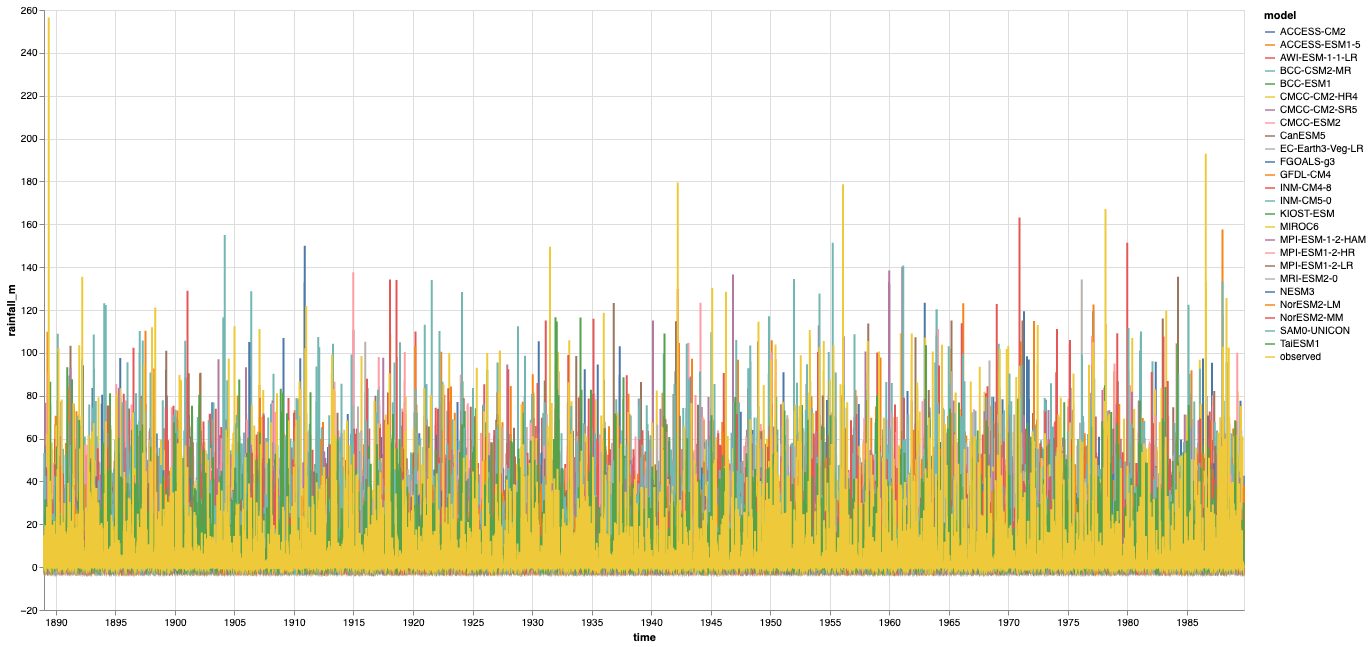

In [8]:
#EDA

# %pip install altair
# %pip install vega_datasets
# %pip install altair_saver

import altair as alt
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')
# Include an image for each plot since Gradescope only supports displaying plots as images
alt.renderers.enable('mimetype')


plot_df = train.reset_index().melt(id_vars='time', var_name='model', value_name='rainfall_m')

alt.Chart(plot_df).mark_line().encode(
    alt.X('time:T'),
    alt.Y('rainfall_m:Q'),
    alt.Color('model:N')
).properties(
    width = 1200,
    height = 600
)

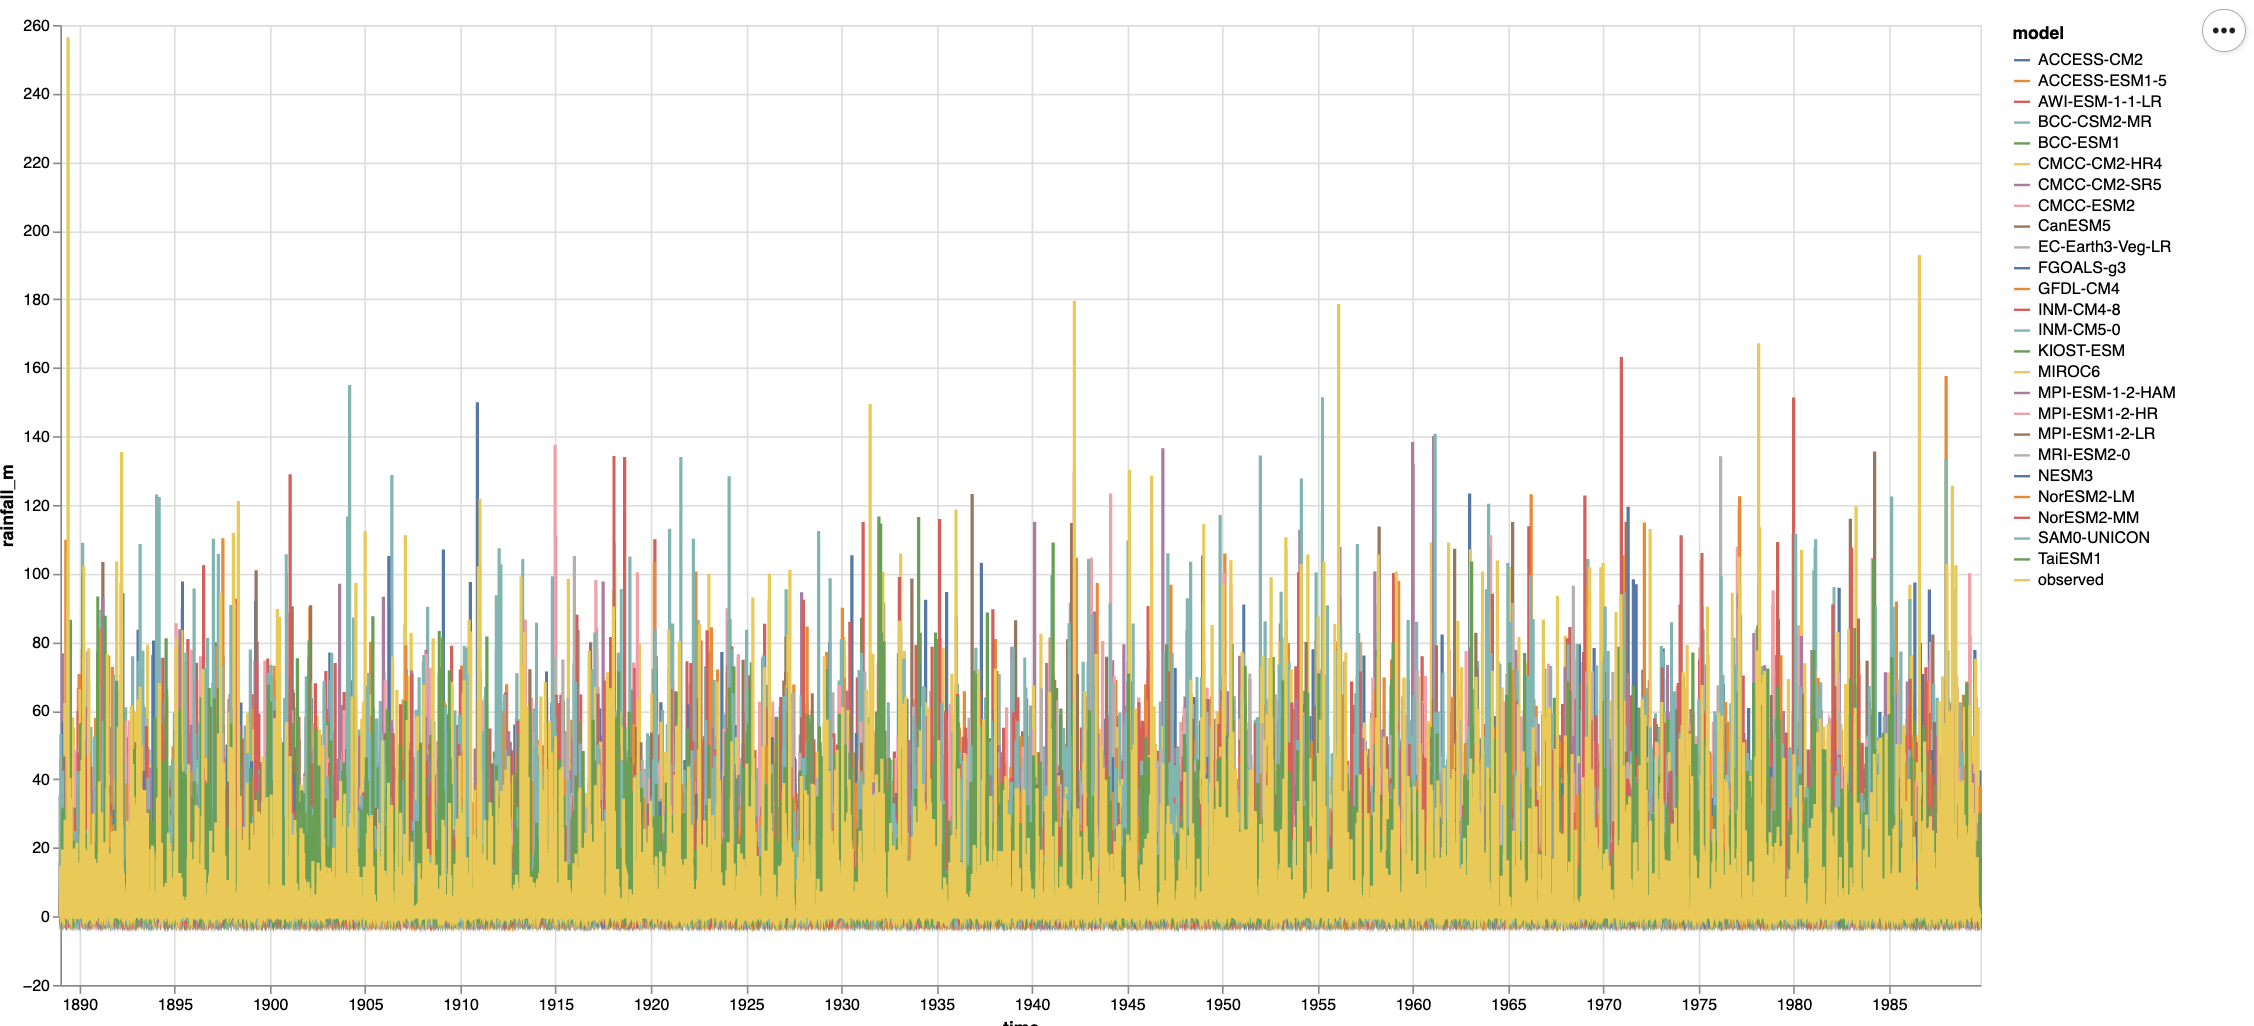

In [9]:
X_train = train.drop('observed', axis=1)
y_train = train['observed']

X_val = validation.drop('observed', axis=1)
y_val = validation['observed']

In [10]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5)

In [11]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [12]:
y_pred = rf_reg.predict(X_val)

In [13]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"RMSE: {rmse}")

RMSE: 7.810454855109463


Text(0, 0.5, 'Model')

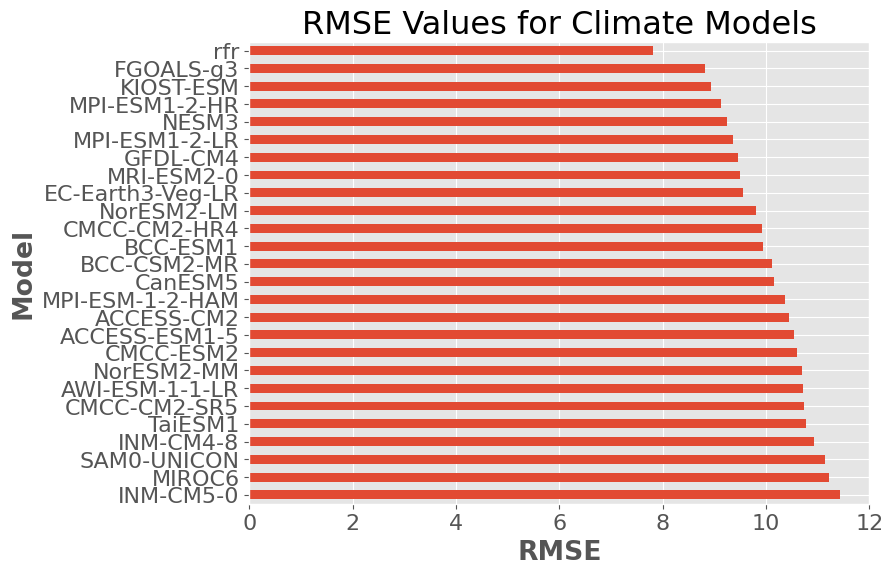

In [14]:
rmse_dict = {'model' : ['rfr'],
             'rmse' : [rmse]}
for column in df:
    rmse_dict['model'].append(column)
    rmse_dict['rmse'].append(np.sqrt(mean_squared_error(y_val, validation[column])))
rmse_df = pd.DataFrame(rmse_dict).iloc[0:-1]
ax = rmse_df.sort_values(by=['rmse'], ascending=False).plot.barh(x='model',
                         y='rmse',
                         legend=False,
                         title='RMSE Values for Climate Models')
ax.set_xlabel('RMSE')
ax.set_ylabel('Model') 

> Answer: 
- From the comparison plot above, we can see that our RF regressor model has the lowest RMSE 7.81 among all models and we get a better result compared to the individual climate models.

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete Question 4 (`Milestone3-task4.ipynb`) from the milestone 3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the Question 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [16]:
# Just replace ___ with the numbers you found from Milestone3-task4.ipynb
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [18]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_val, model.predict(X_val), squared=False):.2f}")

Train RMSE: 8.10
 Test RMSE: 7.81


In [19]:
# ready to deploy
# where this model is saved? Understand the concept of relative path.
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).*** Web console is also completely fine as it is a small file.